In [1]:
import sys
sys.float_info.epsilon

2.220446049250313e-16

In [2]:
import numpy as np

In [3]:
np.finfo(np.float32).eps

1.1920929e-07

In [4]:
np.finfo(np.float64).eps

2.220446049250313e-16

In [5]:
a = 0.1 * 10
b = sum(0.1 for _ in range(10))

In [6]:
a == b

False

In [7]:
abs(a - b) < sys.float_info.epsilon * max(abs(a), abs(b))

True

In [8]:
loopmax = 1000
time1 = 0

dT = 10 ** (-8)
for i in range(loopmax):
    time1 += dT

In [9]:
print(time1)

9.999999999999914e-06


In [10]:
# 情報落ちを避ける方法
count = 0
for i in range(loopmax):
    count += 1
    time2 = count * dT

In [11]:
print(time2)

1e-05


In [12]:
a = np.float32(1000.)
b = np.float32(10 ** (-8))
x1 = (2*a + np.sqrt((2*a)**2 - 4*(a**2 - b)))/2
x2 = (2*a + np.sqrt( ((2*a)**2 - 4*(a**2)) + 4*b))/2
x3 = a + np.sqrt(b)
print(x1, x2, x3)

1000.0001000585712 1000.0000999999997 1000.0001


In [13]:
# numpy.roots
# numpy.roots(p)
# Return the roots of a polynomial with coefficients given in p.

np.roots([1.0, -2*a, a**2 -b])

array([1000.00010006,  999.99989994])

In [14]:
# https://en.wikipedia.org/wiki/Newton%27s_method

def newton_method(f, df, x0, eps):
    for i in range(1, 100):
        x = x0 - f(x0)/df(x0)
        print(i, x)
        if abs(x - x0) < eps: break
        x0 = x
    return x0, i

In [15]:
def f1(x): # function
    return x*x - 9.0

def df1(x): # derivative
    return 2.0*x

eps = 1.e-4 # tolerance
x0 = 1.0    # initial value
x, i = newton_method(f1, df1, x0, eps)
print('Solution = {0}, The number of iteration = {1}'.format(x, i))

1 5.0
2 3.4
3 3.023529411764706
4 3.00009155413138
5 3.000000001396984
Solution = 3.00009155413138, The number of iteration = 5


In [16]:
import sympy as symp

In [17]:
X = symp.Symbol('X')
expr = 3*symp.atan(X-1) + X/4
symp.diff(expr, X)

1/4 + 3/((X - 1)**2 + 1)

In [18]:
def f2(x):
    return 3*np.arctan(x-1) + x/4

def df2(x):
    return 3/((x-1)**2 + 1) + 1/4

eps = 1.e-4
x0 = 2.5
x, i = newton_method(f2, df2, x0, eps)
print('Solution = {0}, The number of iteration = {1}'.format(x, i))

1 -0.5461609971571035
2 2.2090842348709185
3 0.03585045718760327
4 1.3061065733388568
5 0.8992625712186761
6 0.922984253294827
7 0.9229366039525206
Solution = 0.922984253294827, The number of iteration = 7


In [19]:
def f2(x):
    return 3*np.arctan(x-1) + x/4

def df2(x):
    return 3/((x-1)**2 + 1) + 1/4

eps = 1.e-4
x0 = 3.0
x, i = newton_method(f2, df2, x0, eps)
print('Solution = {0}, The number of iteration = {1}'.format(x, i))

1 -1.7899366510379675
2 5.187403618327606
3 -7.6955085944176105
4 14.066850466299464
5 -15.843118329057404
6 16.763530698862425
7 -16.48988979283783
8 16.860165502011874
9 -16.50839278160946
10 16.86280891381147
11 -16.508895238890858
12 16.86288060679935
13 -16.50890886351285
14 16.862882550758783
15 -16.508909232943253
16 16.862882603469018
17 -16.508909242960314
18 16.86288260489824
19 -16.508909243231912
20 16.862882604937
21 -16.508909243239287
22 16.86288260493805
23 -16.508909243239486
24 16.862882604938086
25 -16.508909243239493
26 16.86288260493808
27 -16.508909243239493
28 16.86288260493808
29 -16.508909243239493
30 16.86288260493808
31 -16.508909243239493
32 16.86288260493808
33 -16.508909243239493
34 16.86288260493808
35 -16.508909243239493
36 16.86288260493808
37 -16.508909243239493
38 16.86288260493808
39 -16.508909243239493
40 16.86288260493808
41 -16.508909243239493
42 16.86288260493808
43 -16.508909243239493
44 16.86288260493808
45 -16.508909243239493
46 16.86288260493

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

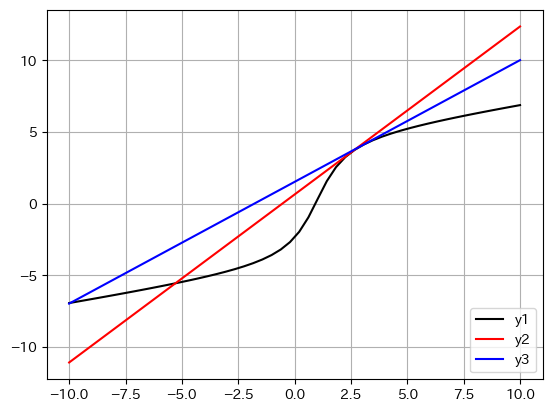

In [21]:
x = np.linspace(-10, 10, 50)
y1 = f2(x)
y2 = df2(2.5)*(x - 2.5) + f2(2.5)
y3 = df2(3.0)*(x - 3.0) + f2(3.0)
plt.plot(x, y1, c='k', label='y1')
plt.plot(x, y2, c='r', label='y2')
plt.plot(x, y3, c='b', label='y3')
plt.grid()
plt.legend(loc='lower right')

In [22]:
import scipy as sp

Text(0, 0.5, 'y')

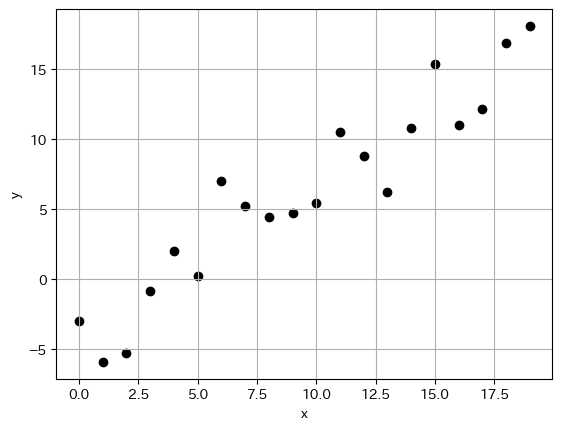

In [23]:
# numpyのみならずscipyの確率の関数の初期値を定める
np.random.seed(123)

num = 20
x = np.arange(0,num,1)
y = 1.2*x + sp.stats.uniform(loc=-10.0, scale=10.0).rvs(num)

plt.scatter(x, y, color='k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

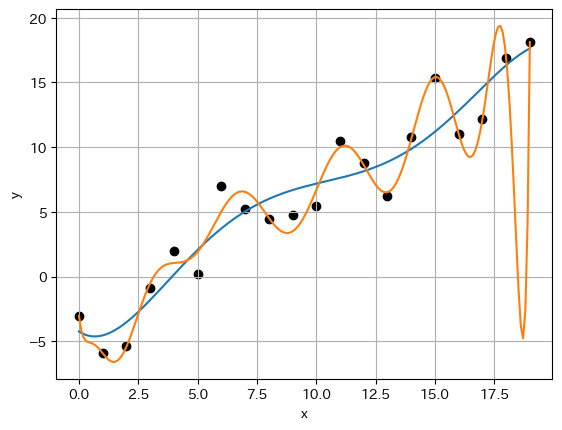

In [32]:
p5 = np.polyfit(x, y, deg=5)
p15 = np.polyfit(x, y, deg=15)
xx = np.linspace(np.min(x), np.max(x), 200)
y5 = np.polyval(p5, xx)
y15 = np.polyval(p15, xx)

plt.scatter(x, y, color='k')
plt.plot(xx, y5)
plt.plot(xx, y15)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

In [43]:
from scipy.interpolate import make_interp_spline

Text(0, 0.5, 'y')

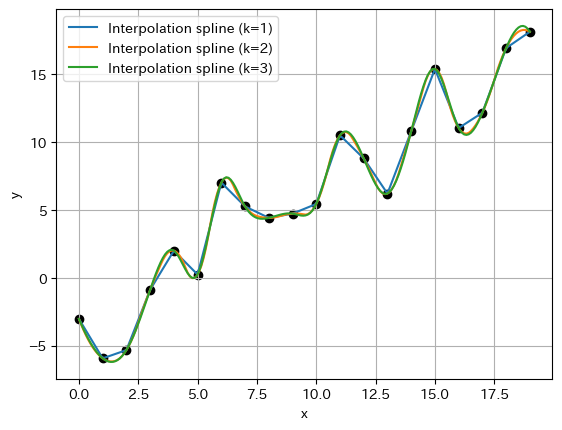

In [44]:
plt.scatter(x, y, color='k')

for k in [1, 2, 3]:
    sp_i = make_interp_spline(x, y, k=k)
    plt.plot(xx, sp_i(xx), label=f'Interpolation spline (k={k})')

plt.plot()
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')